# 6.5 Lab 2: Ridge Regression and the Lasso



<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#6.6.1-Ridge-Regression">Ridge Regression</a></li>
        <li><a href="#6.6.2-The-Lasso">The Lasso</a></li>
    </ol>
</div>


We will now perform ridge regression and the lasso in order to predict **Salary** on the **Hitters** data. Before proceeding ensure that the missing values have been removed from the data.

> You can download **Hitters** data set for from **[here.](https://drive.google.com/file/d/1e2NqNJGkCTAGBee8JHGNGCJHplG5R2YQ/view?usp=sharing)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale

In [3]:
hitters = pd.read_csv('Hitters.csv')
hitters.shape

(322, 20)

In [4]:
hitters.Salary.isna().sum() # number of NaN valeus in Salary column

59

In [5]:
hitters = hitters.dropna(axis=0)
hitters.shape

(263, 20)

In [6]:
X = hitters.loc[:, hitters.columns != 'Salary']
y = hitters['Salary']

In [7]:
def get_index(df):
    col_index = {}
    column = df.columns
    for col in column:
        col_index[col] = df.columns.get_loc(col)
    return col_index

In [8]:
column_index = get_index(X)
print(column_index)

{'AtBat': 0, 'Hits': 1, 'HmRun': 2, 'Runs': 3, 'RBI': 4, 'Walks': 5, 'Years': 6, 'CAtBat': 7, 'CHits': 8, 'CHmRun': 9, 'CRuns': 10, 'CRBI': 11, 'CWalks': 12, 'League': 13, 'Division': 14, 'PutOuts': 15, 'Assists': 16, 'Errors': 17, 'NewLeague': 18}


In [9]:
def label_encoder(df, index):
    """
    We will covnert categorical values into the dummies
    using LabelEncoder from scikit-learn

    """
    le = LabelEncoder()
    for c in index:
        df.iloc[:, c] = le.fit_transform(df.iloc[:, c])
    return df

In [10]:
X = label_encoder(X, [13, 14, 18]) # running previously defined function will turn categorical variables into dummies

F:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
X.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1


In [12]:
X.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'NewLeague'],
      dtype='object')

----

## _6.6.1 Ridge Regression_

`Ridge` method from `sklearn` performs ridge regression for an automatically selected range of $\lambda$. However, here we have chosen to implement the function over a grid of values ranging $\lambda=10^{10}$ to $\lambda=10^{-2}$, essentially covering the full range of scenarios from the null model containing only the intercept, to the least-squares fit.

In [13]:
grid = 10**np.linspace(10, -2, 100)*0.5
grid

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

We will build a function `ridge_coefs` to run models for the $\lambda$ values defined in the previous step.

In [14]:
def ridge_coefs(X, y, alphas):
    
    coefs = []
    ridge = Ridge(normalize = True)
    
    for a in alphas:
        ridge.set_params(alpha = a)
        ridge.fit(X, y)
        coefs.append(ridge.coef_)
        
    return coefs

In [15]:
ridge_coefs = ridge_coefs(X, y, grid)

In [16]:
print(np.shape(ridge_coefs))

(100, 19)


Associated with each value of $\lambda$ is a vector of ridge regression coefficients, stored in a matrix that can be accessed by `coefs` in the below function. In this case, it is a 19×100 matrix, with 19 rows (one for each predictor, plus an intercept) and 100 columns (one for each value of $\lambda$).

Text(0, 0.5, 'weights')

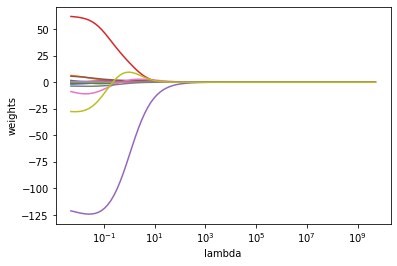

In [17]:
ax = plt.gca()
ax.plot(grid, ridge_coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')

We expect the coefficient estimates to be much smaller, in terms of $l_2$ norm, when a large value of $\lambda$ is used, as compared to when a small value of $\lambda$ is used.

We now split the samples into a training set and a test set in order to estimate the test error of ridge regression and the lasso. We will use `train_test_split` method from `sklearn` to split the model in half.

In [18]:
# we split the training and test data
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

Next, we fit a ridge regression model on the training set, and evaluate its MSE on the test set, using $\lambda$ = 4. Note the use of the `predict()` function again.

In [19]:
ridge2 = Ridge(normalize = True, alpha = 4)
ridge2.fit(X_train, y_train)
ridge2_pred = ridge2.predict(X_test)

print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print('\nMSE: ', mean_squared_error(y_test, ridge2_pred)) # MSE of the model

AtBat         0.098658
Hits          0.446094
HmRun         1.412107
Runs          0.660773
RBI           0.843403
Walks         1.008473
Years         2.779882
CAtBat        0.008244
CHits         0.034149
CHmRun        0.268634
CRuns         0.070407
CRBI          0.070060
CWalks        0.082795
League        4.241051
Division    -30.768885
PutOuts       0.104747
Assists      -0.003739
Errors        0.268363
NewLeague     4.123474
dtype: float64

MSE:  106216.52238005561


* The test MSE is 106216.52

Note that if we had instead simply fit a model with just an intercept.

Now let's look at the MSE value resulting by fitting a ridge regression model with a very large value of $\lambda$. Note that 1e10 means 1010.

In [20]:
ridge3 = Ridge(normalize = True, alpha = 1e10)
ridge3.fit(X_train, y_train)
ridge3_pred = ridge3.predict(X_test)

print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print('\nMSE: ', mean_squared_error(y_test, ridge3_pred)) # MSE of the model

AtBat        1.317464e-10
Hits         4.647486e-10
HmRun        2.079865e-09
Runs         7.726175e-10
RBI          9.390640e-10
Walks        9.769219e-10
Years        3.961442e-09
CAtBat       1.060533e-11
CHits        3.993605e-11
CHmRun       2.959428e-10
CRuns        8.245247e-11
CRBI         7.795451e-11
CWalks       9.894387e-11
League      -2.501281e-09
Division    -1.549951e-08
PutOuts      7.268991e-11
Assists     -2.615885e-12
Errors       2.084514e-10
NewLeague   -2.023196e-09
dtype: float64

MSE:  172862.23580379886


* The test MSE is 172862

So fitting a ridge regression model with $\lambda$ = 4 leads to a much lower test MSE than fitting a model with just an intercept. We now check whether there is any benefit to performing ridge regression with $\lambda$ = 4 instead of just performing least squares regression.

Recall that least squares is simply ridge regression with $\lambda$ = 0.

In [21]:
ridge4= Ridge(normalize = True, alpha = 0)
ridge4.fit(X_train, y_train)
ridge4_pred = ridge4.predict(X_test)

print(pd.Series(ridge4.coef_, index = X.columns)) # Print coefficients
print('\nMSE: ', mean_squared_error(y_test, ridge4_pred)) # MSE of the model

AtBat         -1.821115
Hits           4.259156
HmRun         -4.773401
Runs          -0.038760
RBI            3.984578
Walks          3.470126
Years          9.498236
CAtBat        -0.605129
CHits          2.174979
CHmRun         2.979306
CRuns          0.266356
CRBI          -0.598456
CWalks         0.171383
League       133.743163
Division    -113.743875
PutOuts        0.421063
Assists        0.464379
Errors        -6.024576
NewLeague    -81.927763
dtype: float64

MSE:  116690.46856659841


We see that ridge regression with $\lambda$ = 4 indeed improves model over the simple least-squares model.

In general, instead of arbitrarily choosing $\lambda$ = 4, it would be better to use cross-validation to choose the tuning parameter $\lambda$. We can do this using the built-in cross-validation function, `RidgeCV`.

In [22]:
ridge_cv = RidgeCV(alphas = grid, scoring = 'neg_mean_squared_error', normalize=True, cv=10)
ridge_cv.fit(X_train, y_train)
print('Lambda that results in lowest CV error: ', round(ridge_cv.alpha_, 4))

Lambda that results in lowest CV error:  0.5749


F:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


What is the test MSE associated with this value of $\lambda$?

In [23]:
ridge5 = Ridge(alpha = ridge_cv.alpha_, normalize = True)
ridge5.fit(X_train, y_train)
mean_squared_error(y_test, ridge5.predict(X_test))

99825.6489629273

This represents a further improvement over the test MSE that we got using $\lambda$ = 4. Finally, we refit our ridge regression model on the full data set, using the value of $\lambda$ chosen by cross-validation, and examine the coefficient estimates.

In [24]:
print(pd.Series(ridge5.coef_, index = X.columns))

AtBat        -0.013534
Hits          0.864143
HmRun        -0.291615
Runs          0.721999
RBI           1.318149
Walks         2.092914
Years         1.200022
CAtBat        0.006651
CHits         0.052020
CHmRun        0.513053
CRuns         0.106745
CRBI          0.128286
CWalks        0.098953
League       18.915652
Division    -92.175508
PutOuts       0.280247
Assists      -0.017241
Errors       -0.315756
NewLeague     9.936172
dtype: float64


As expected, none of the coefficients are zero—ridge regression does not perform variable selection!

-------
## _6.6.2 The Lasso_

We saw that ridge regression with a wise choice of $\lambda$ can outperform the least squares as well as the null model on the Hitters data set. We now ask whether the lasso can yield either a more accurate or a more interpretable model than ridge regression. In order to fit a lasso model, we use `Lasso` method from `sklearn` library. Other than that change, we proceed just as we did in fitting a ridge model.

In [25]:
def lasso_coefs(X, y, grid):
    
    lasso_coefs = []
    lasso = Lasso(max_iter=100000, normalize=True) # setup maximum iterations to 100000
    
    for g in grid:
        lasso.set_params(alpha = g)
        lasso.fit(X, y)
        lasso_coefs.append(lasso.coef_)
        
    return lasso_coefs

In [26]:
lasso_coef = lasso_coefs(scale(X_train), y_train, grid)

Text(0, 0.5, 'weights')

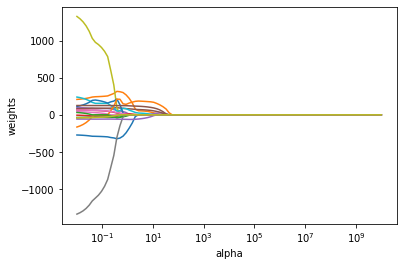

In [27]:
ax = plt.gca()
ax.plot(grid*2, lasso_coef)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

We can see from the coefficient plot that depending on the choice of tuning parameter, some of the coefficients will be exactly equal to zero. We now perform cross-validation and compute the associated test error.

In [28]:
lasso_cv = LassoCV(alphas=None, normalize=True, cv=10, max_iter = 100000)
lasso_cv.fit(X_train, y_train)
print('Lambda that results in lowest CV error is: ', round(lasso_cv.alpha_, 4))

Lambda that results in lowest CV error is:  2.403


In [29]:
lasso = Lasso(max_iter = 10000, normalize = True)
lasso.set_params(alpha=lasso_cv.alpha_)
lasso_pred = lasso.fit(X_train, y_train).predict(X_test)
mean_squared_error(y_test, lasso_pred)

104960.66341829994

This is substantially lower than the test set MSE of the null model and of the least-squares, and very similar to the test MSE of ridge regression with $\lambda$ chosen by cross-validation.

However, the lasso has a substantial advantage over ridge regression in that the resulting coefficient estimates are sparse. Here we see that 12 of the 19 coefficient estimates are exactly zero. So the lasso model with $\lambda$ chosen by cross-validation contains only seven variables.

In [30]:
pd.Series(lasso.coef_, index=X.columns)

AtBat         0.000000
Hits          1.082448
HmRun         0.000000
Runs          0.000000
RBI           0.000000
Walks         2.906385
Years         0.000000
CAtBat        0.000000
CHits         0.000000
CHmRun        0.219372
CRuns         0.000000
CRBI          0.513974
CWalks        0.000000
League        0.000000
Division    -89.064199
PutOuts       0.368401
Assists      -0.000000
Errors       -0.000000
NewLeague     0.000000
dtype: float64